In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [118]:
dataFrame = pd.read_excel("merc.xlsx")

In [119]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [120]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [121]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Figure size 700x500 with 0 Axes>

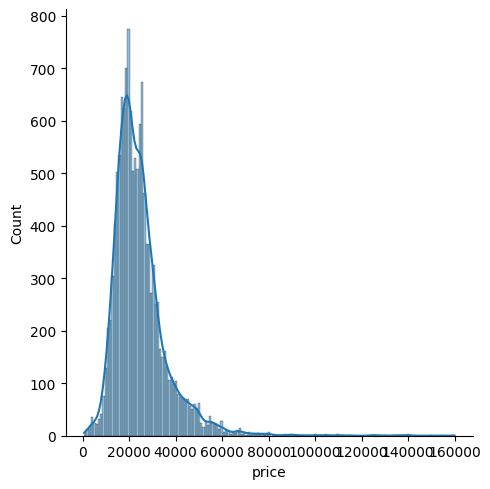

In [122]:
plt.figure(figsize=(7,5))
##sbn.distplot(dataFrame["price"])
sbn.displot(dataFrame["price"], kde=True)

## Her iki yöntem de çalışacaktır; hangisini kullanacağınız ihtiyaçlarınıza bağlıdır. displot daha esnek ve figure düzeyinde çalışırken, histplot belirli bir eksen üzerinde histogram çizimi yapar.

<Axes: xlabel='price', ylabel='Count'>

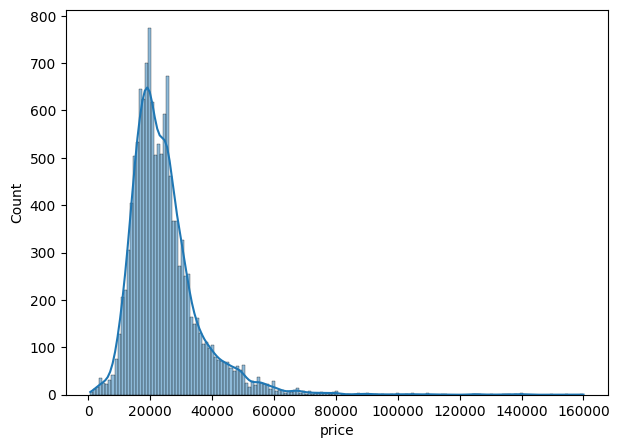

In [123]:
plt.figure(figsize=(7,5))
sbn.histplot(dataFrame["price"], kde=True)

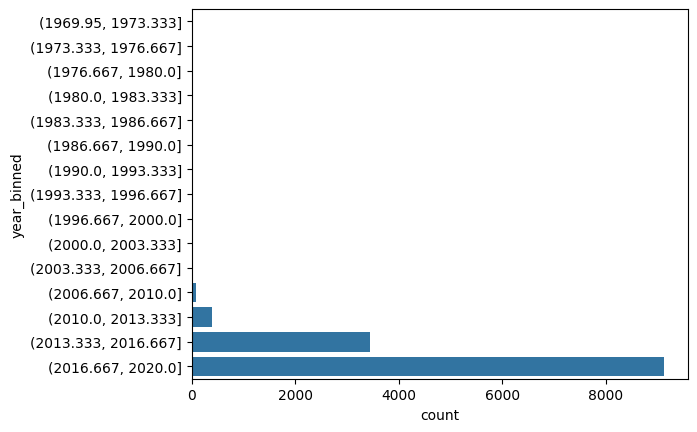

In [124]:
dataFrame['year_binned'] = pd.cut(dataFrame['year'], bins=15)
sbn.countplot(dataFrame['year_binned'])
plt.show()

In [125]:
# Sadece sayısal sütunları seçmek
numeric_df = dataFrame.select_dtypes(include=[float, int])

# Korelasyon matrisi oluşturmak
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.520712 -0.738027  0.012480 -0.094626   -0.142147
price       0.520712  1.000000 -0.537214  0.268717 -0.438445    0.516126
mileage    -0.738027 -0.537214  1.000000 -0.160223  0.202850    0.063652
tax         0.012480  0.268717 -0.160223  1.000000 -0.513742    0.338341
mpg        -0.094626 -0.438445  0.202850 -0.513742  1.000000   -0.339862
engineSize -0.142147  0.516126  0.063652  0.338341 -0.339862    1.000000


In [126]:
price_correlation = correlation_matrix["price"]
print(price_correlation)

year          0.520712
price         1.000000
mileage      -0.537214
tax           0.268717
mpg          -0.438445
engineSize    0.516126
Name: price, dtype: float64


<Axes: xlabel='mileage', ylabel='price'>

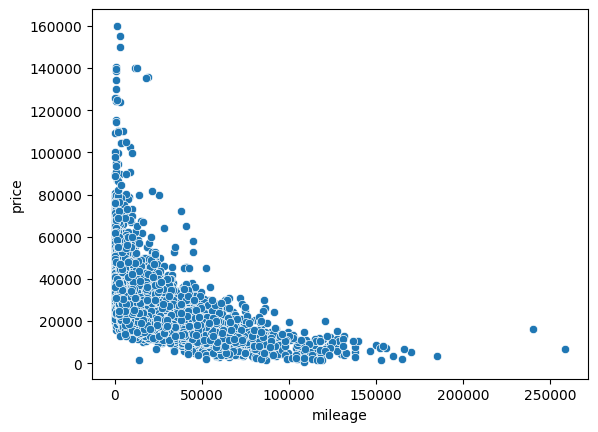

In [127]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

In [128]:
dataFrame.sort_values("price",ascending = False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize,year_binned
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0,"(2016.667, 2020.0]"
10044,2020,154998,Automatic,3000,150,21.4,4.0,"(2016.667, 2020.0]"
5,2011,149948,Automatic,3000,570,21.4,6.2,"(2010.0, 2013.333]"
8737,2019,140319,Semi-Auto,785,150,22.1,4.0,"(2016.667, 2020.0]"
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0,"(2016.667, 2020.0]"
8,2019,139948,Automatic,12000,145,21.4,4.0,"(2016.667, 2020.0]"
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0,"(2016.667, 2020.0]"
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0,"(2016.667, 2020.0]"
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0,"(2016.667, 2020.0]"
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0,"(2016.667, 2020.0]"


In [129]:
dataFrame.sort_values("price",ascending = True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize,year_binned
11816,2003,650,Manual,109090,235,40.0,1.4,"(2000.0, 2003.333]"
12008,2010,1350,Manual,116126,145,54.3,2.0,"(2006.667, 2010.0]"
11765,2000,1490,Automatic,87000,265,27.2,3.2,"(1996.667, 2000.0]"
11549,2002,1495,Automatic,13800,305,39.8,2.7,"(2000.0, 2003.333]"
12594,2004,1495,Manual,119000,300,34.5,1.8,"(2003.333, 2006.667]"
11174,2001,1695,Automatic,108800,325,31.7,3.2,"(2000.0, 2003.333]"
12710,2006,1695,Automatic,153000,300,33.6,1.8,"(2003.333, 2006.667]"
12766,2004,1780,Automatic,118000,265,41.5,2.2,"(2003.333, 2006.667]"
12009,2007,1800,Automatic,84000,200,42.8,1.5,"(2006.667, 2010.0]"
11764,1998,1990,Automatic,99300,265,32.1,2.3,"(1996.667, 2000.0]"


In [130]:
len(dataFrame) * 0.01

131.19

In [131]:
yuzdeDoksanDokuzDF = dataFrame.sort_values("price",ascending = False).iloc[131:]

In [132]:
yuzdeDoksanDokuzDF.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\Ozge\AppData\Local\Temp\ipykernel_9436\714646382.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(yuzdeDoksanDokuzDF["price"])


<Axes: xlabel='price', ylabel='Density'>

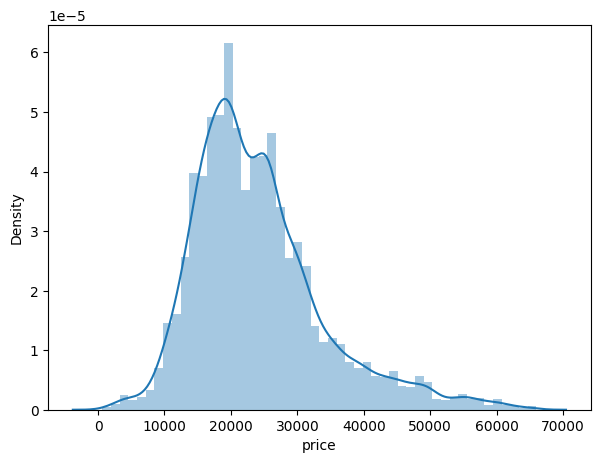

In [133]:
plt.figure(figsize=(7,5))
sbn.distplot(yuzdeDoksanDokuzDF["price"])

In [134]:
# Sadece sayısal sütunları seçmek
numeric_df = dataFrame.select_dtypes(include=[float, int])

# Yıl bazında gruplama ve fiyatların ortalamasını hesaplama
price_mean_by_year = numeric_df.groupby("year").mean()["price"]
print(price_mean_by_year)


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64


In [135]:
# Sadece sayısal sütunları seçmek
numeric_df = yuzdeDoksanDokuzDF.select_dtypes(include=[float, int])

# Yıl bazında gruplama ve fiyatların ortalamasını hesaplama
price_mean_by_year = numeric_df.groupby("year").mean()["price"]
print(price_mean_by_year)

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64


In [136]:
# Group by 'year', then calculate the mean of the 'price' column
dataFrame[dataFrame.year != 1970].groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [137]:
dataFrame = yuzdeDoksanDokuzDF

In [138]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [139]:
dataFrame = dataFrame[dataFrame.year != 1970]

In [140]:
dataFrame.groupby("year")["price"].mean()


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [141]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize,year_binned
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0,"(2016.667, 2020.0]"
5779,2020,65990,Semi-Auto,999,145,28.0,4.0,"(2016.667, 2020.0]"
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0,"(2016.667, 2020.0]"
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0,"(2016.667, 2020.0]"
8814,2019,64999,Semi-Auto,119,145,40.9,3.0,"(2016.667, 2020.0]"


In [142]:
dataFrame = dataFrame.drop("transmission", axis =1)

In [143]:
dataFrame

,year,price,mileage,tax,mpg,engineSize,year_binned
6177,2019,65990,5076,150,30.4,3.0,"(2016.667, 2020.0]"
5779,2020,65990,999,145,28.0,4.0,"(2016.667, 2020.0]"
3191,2020,65980,3999,145,28.0,4.0,"(2016.667, 2020.0]"
4727,2019,65000,3398,145,27.2,4.0,"(2016.667, 2020.0]"
8814,2019,64999,119,145,40.9,3.0,"(2016.667, 2020.0]"
...,...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7,"(2000.0, 2003.333]"
12594,2004,1495,119000,300,34.5,1.8,"(2003.333, 2006.667]"
11765,2000,1490,87000,265,27.2,3.2,"(1996.667, 2000.0]"
12008,2010,1350,116126,145,54.3,2.0,"(2006.667, 2010.0]"


In [144]:
y = dataFrame["price"].values
x = dataFrame.drop("price" , axis =1 ).values

In [145]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [146]:
x

array([[2019, 5076, 150, 30.4, 3.0,
        Interval(2016.667, 2020.0, closed='right')],
       [2020, 999, 145, 28.0, 4.0,
        Interval(2016.667, 2020.0, closed='right')],
       [2020, 3999, 145, 28.0, 4.0,
        Interval(2016.667, 2020.0, closed='right')],
       ...,
       [2000, 87000, 265, 27.2, 3.2,
        Interval(1996.667, 2000.0, closed='right')],
       [2010, 116126, 145, 54.3, 2.0,
        Interval(2006.667, 2010.0, closed='right')],
       [2003, 109090, 235, 40.0, 1.4,
        Interval(2000.0, 2003.333, closed='right')]], dtype=object)

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [149]:
len(x_train)

9090

In [150]:
len(x_test)

3897

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
scaler = MinMaxScaler()

In [ ]:
##x_train = scaler.fit_transform(x_train)
##x_test = scaler.transform(x_test)

In [157]:
import pandas as pd
import numpy as np

def interval_to_midpoint(interval):
    return (interval.left + interval.right) / 2

# NumPy dizilerini DataFrame'e çevir
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

# Aralıkları dönüştürmek için her sütuna map uygulama
for col in x_train_df.columns:
    x_train_df[col] = x_train_df[col].map(lambda x: interval_to_midpoint(x) if isinstance(x, pd.Interval) else x)
    x_test_df[col] = x_test_df[col].map(lambda x: interval_to_midpoint(x) if isinstance(x, pd.Interval) else x)

# DataFrame'leri tekrar NumPy dizisine çevir
x_train = x_train_df.to_numpy()
x_test = x_test_df.to_numpy()


In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [159]:
x_train.shape

(9090, 6)

In [160]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [161]:
model.fit(x = x_train, y = y_train,validation_data=(x_test,y_test),batch_size = 250 ,epochs=300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 684237248.0000 - val_loss: 688107520.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 669513664.0000 - val_loss: 684421312.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 657760896.0000 - val_loss: 558830528.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 490757376.0000 - val_loss: 374873280.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 328663552.0000 - val_loss: 199443296.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 150381040.0000 - val_loss: 67847280.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59851040.0000 - val_loss: 58042316.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57836304.0000 - val_loss: 57041372.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55992692.0000 - val_loss: 56521068.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52918200.0000 - val_loss: 56536124.000

In [162]:
kayipVerisi = pd.DataFrame(model.history.history)

In [163]:
kayipVerisi.head()

,loss,val_loss
0,676849984.0,688107520.0
1,670788864.0,684421312.0
2,625982208.0,558830528.0
3,445038272.0,374873280.0
4,285189920.0,199443296.0


<Axes: >

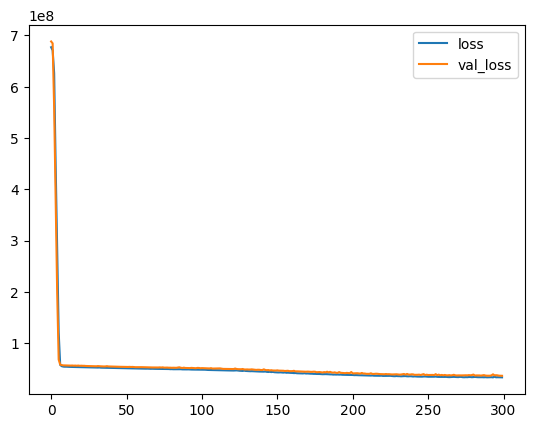

In [164]:
kayipVerisi.plot()

In [165]:
 from sklearn.metrics import mean_squared_error, mean_absolute_error

In [166]:
tahminDizisi = model.predict(x_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [167]:
tahminDizisi

array([[23599.701],
       [31226.7  ],
       [26397.795],
       ...,
       [23723.152],
       [13964.39 ],
       [27201.436]], dtype=float32)

In [168]:
mean_absolute_error(y_test,tahminDizisi)

4312.548145508565

In [169]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


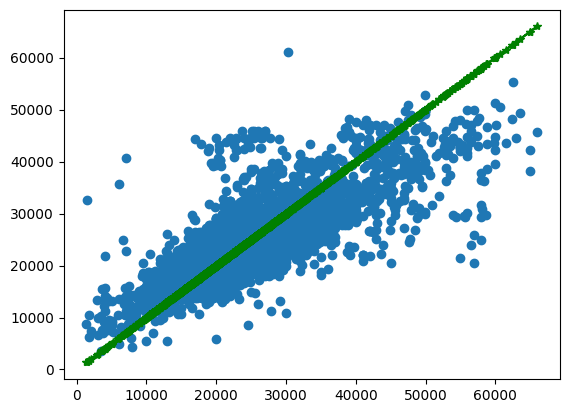

In [171]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [222]:
dataFrame.iloc[2]

year                         2020
price                       65980
mileage                      3999
tax                           145
mpg                          28.0
engineSize                    4.0
year_binned    (2016.667, 2020.0]
Name: 3191, dtype: object

In [223]:
yeniArabaSeries = dataFrame.drop("price",axis=1).iloc[2]

In [224]:
yeniArabaSeries

year                         2020
mileage                      3999
tax                           145
mpg                          28.0
engineSize                    4.0
year_binned    (2016.667, 2020.0]
Name: 3191, dtype: object

In [225]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,6))

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [226]:
print(yeniArabaSeries.shape)


(6,)


In [227]:
print(yeniArabaSeries.apply(type))


year                              <class 'numpy.int64'>
mileage                           <class 'numpy.int64'>
tax                               <class 'numpy.int64'>
mpg                             <class 'numpy.float64'>
engineSize                      <class 'numpy.float64'>
year_binned    <class 'pandas._libs.interval.Interval'>
Name: 3191, dtype: object
